# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
loan_data_preprocessed_backup = pd.read_csv('data/loan_data_2007_2014_processed.csv')

/Users/graystone/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [4]:
loan_data_preprocessed.drop('Unnamed: 0', inplace=True, axis=1)
loan_data_preprocessed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state TX,addr_state UT,addr_state VA,addr_state VT,addr_state WA,addr_state WI,addr_state WV,addr_state WY,initial_list_status f,initial_list_status w
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0,0,0,0,0,0,0,0,1,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0,0,0,0,0,0,0,0,1,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0,0,0,0,0,0,0,0,1,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0,0,0,0,0,0,0,0,1,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0,0,0,0,0,0,0,0,1,0


In [5]:
loan_data_preprocessed.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'to

In [6]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [7]:
loan_data_defaults.shape

(43236, 188)

In [8]:
loan_data_defaults.isnull().sum()[loan_data_defaults.isnull().sum() > 0]

emp_title                       3287
emp_length                      2337
desc                           27396
title                              3
earliest_cr_line                   3
mths_since_last_delinq         23950
mths_since_last_record         37821
revol_util                        53
last_pymnt_d                     376
next_pymnt_d                   42475
last_credit_pull_d                 6
collections_12_mths_ex_med        28
mths_since_last_major_derog    35283
tot_coll_amt                   10780
tot_cur_bal                    10780
earliest_cr_line_date              3
dtype: int64

# Independent Variables

In [9]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

/Users/graystone/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [10]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# Dependent Variables

In [11]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.

/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [13]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [15]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.

/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
loan_data_defaults['CCF'].describe()
# Shows some descriptive statisics for the values of a column.

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [17]:
loan_data_defaults.to_csv('data/loan_data_defaults.csv')
# We save the data to a CSV file.

# Some Plotting

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

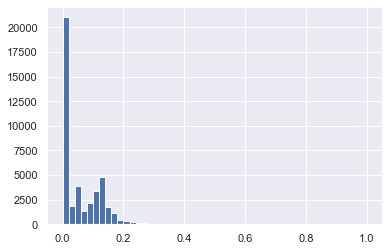

In [19]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

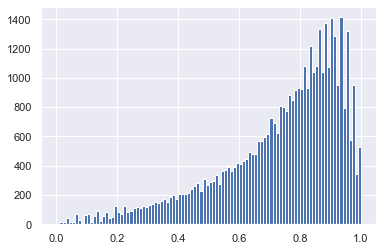

In [20]:
plt.hist(loan_data_defaults['CCF'], bins = 100)

In [21]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1) 
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
loan_data_defaults['recovery_rate_0_1']

1         1
8         1
9         1
12        1
14        1
         ..
466254    0
466256    0
466276    1
466277    0
466281    0
Name: recovery_rate_0_1, Length: 43236, dtype: int64

In [23]:
loan_data_defaults.to_csv('data/loan_data_defaults.csv')
# We save the data to a CSV file.

# LGD Model

## Splitting Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
loan_data_defaults = pd.read_csv('data/loan_data_defaults.csv')

/Users/graystone/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
loan_data_defaults.drop('Unnamed: 0', axis=1, inplace = True)
loan_data_defaults.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state VT,addr_state WA,addr_state WI,addr_state WV,addr_state WY,initial_list_status f,initial_list_status w,recovery_rate,CCF,recovery_rate_0_1
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0,0,0,0,0,1,0,0.046832,0.817416,1
1,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,0,0,0,0,0,1,0,0.033761,0.971068,1
2,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,0,0,0,0,0,1,0,0.050100,0.874701,1
3,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,...,0,0,0,0,0,1,0,0.049367,0.860429,1
4,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,...,0,0,0,0,0,1,0,0.064510,0.456653,1


In [27]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

## Prepare the input data

In [28]:
features_all = ['grade A',
'grade B',
'grade C',
'grade D',
'grade E',
'grade F',
'grade G',
'home_ownership MORTGAGE',
'home_ownership NONE',
'home_ownership OTHER',
'home_ownership OWN',
'home_ownership RENT',
'verification_status Not Verified',
'verification_status Source Verified',
'verification_status Verified',
'purpose car',
'purpose credit_card',
'purpose debt_consolidation',
'purpose educational',
'purpose home_improvement',
'purpose house',
'purpose major_purchase',
'purpose medical',
'purpose moving',
'purpose other',
'purpose renewable_energy',
'purpose small_business',
'purpose vacation',
'purpose wedding',
'initial_list_status f',
'initial_list_status w',
'term_int',
'emp_length_int',
'months_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [29]:
features_reference_cat = ['grade G',
'home_ownership RENT',
'verification_status Verified',
'purpose credit_card',
'initial_list_status f']
# List of the dummy variable reference categories. 

In [30]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]
# Here we keep only the variables we need for the model.

In [31]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [32]:
lgd_inputs_stage_1_train.isnull().sum()
# Check for missing values. We check whether the value of each row for each column is missing or not,
# then sum accross columns.

grade A                                0
grade B                                0
grade C                                0
grade D                                0
grade E                                0
grade F                                0
home_ownership MORTGAGE                0
home_ownership NONE                    0
home_ownership OTHER                   0
home_ownership OWN                     0
verification_status Not Verified       0
verification_status Source Verified    0
purpose car                            0
purpose debt_consolidation             0
purpose educational                    0
purpose home_improvement               0
purpose house                          0
purpose major_purchase                 0
purpose medical                        0
purpose moving                         0
purpose other                          0
purpose renewable_energy               0
purpose small_business                 0
purpose vacation                       0
purpose wedding 

__We use a two staged model__

* Stage 1: Is the recovery Rate Greater than 0? (__Logistic regression__ model)
* Stage 2: If No, than Recovery rate = 0, If Yes, than we estimate the recovery with __Linear Regression__ model

## Stage 1 - LGD Model (Logistic Regression)

In [33]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [34]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

/Users/graystone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
feature_name = lgd_inputs_stage_1_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [36]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_1.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
pd.set_option('display.float_format', lambda x: '%.8f' % x)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.00008506,nan
1,grade A,-0.00001036,0.99990137
2,grade B,-0.00006555,0.99922951
3,grade C,-0.00012901,0.99843227
4,grade D,0.00002023,0.99976408
5,grade E,0.00001479,0.99984369
6,grade F,0.00007296,0.99932913
7,home_ownership MORTGAGE,-0.00003464,0.99890654
8,home_ownership NONE,0.00000089,0.99999910
9,home_ownership OTHER,0.00000059,0.99999877


## Testing the Model

In [37]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
# Here we keep only the variables we need for the model.

In [38]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [39]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [40]:
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 1, 1, 1])

In [41]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [42]:
y_hat_test_proba_lgd_stage_1
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.40365706, 0.59634294],
       [0.392134  , 0.607866  ],
       [0.53459029, 0.46540971],
       ...,
       [0.49560743, 0.50439257],
       [0.4237113 , 0.5762887 ],
       [0.46717399, 0.53282601]])

In [43]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

In [44]:
y_hat_test_proba_lgd_stage_1

array([0.59634294, 0.607866  , 0.46540971, ..., 0.50439257, 0.5762887 ,
       0.53282601])

In [45]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [46]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [47]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)
# Concatenates two dataframes.

In [48]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [49]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [50]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
21362,1,0.59634294
8768,1,0.60786600
11903,0,0.46540971
42973,1,0.55391562
29933,0,0.40397223


## Estimating the Аccuracy of the Мodel

In [51]:
tr = 0.6
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [52]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,2849,913
1,2590,2296


In [53]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.32944033,0.10557354
1,0.29949121,0.26549491


In [54]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1] # Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.5949352451433858

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC curve')

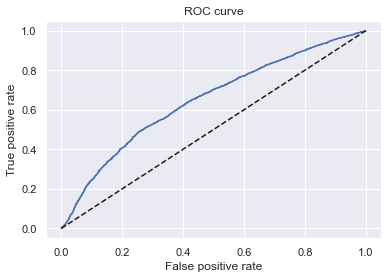

In [57]:
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, false_positive_rate, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [58]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6481683500232739

In [59]:
# let's save the model
import pickle 
pickle.dump(reg_lgd_st_1, open('data/lgd_model_stage_1.sav', 'wb')) # to read the model it you should use 'rb'

### Stage 2 – Linear Regression

In [60]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]
# Here we take only rows where the original recovery rate variable is greater than one,
# i.e. where the indicator variable we created is equal to 1

In [61]:
# LGD model stage 2 datasets: how much more than 0 is the recovery rate
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [62]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [63]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [64]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]
# Here we keep only the variables we need for the model.

In [65]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [66]:
reg_lgd_st_2 = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression()

In [67]:
feature_name = lgd_inputs_stage_2_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [68]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values.round(3)
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
pd.set_option('display.float_format', lambda x: '%.8f' % x)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.24068577,nan
1,grade A,-0.06826892,0.00000000
2,grade B,-0.05083556,0.00000000
3,grade C,-0.03748066,0.00000000
4,grade D,-0.02717310,0.00000000
5,grade E,-0.01315941,0.00200000
6,grade F,-0.00526017,0.27500000
7,home_ownership MORTGAGE,0.00283221,0.06100000
8,home_ownership NONE,0.14590350,0.00000000
9,home_ownership OTHER,-0.00947592,0.64400000


### Stage 2 – Linear Regression Evaluation

In [69]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
# Here we keep only the variables we need for the model

In [70]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [71]:
lgd_inputs_stage_2_test.columns.values
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

array(['grade A', 'grade B', 'grade C', 'grade D', 'grade E', 'grade F',
       'home_ownership MORTGAGE', 'home_ownership NONE',
       'home_ownership OTHER', 'home_ownership OWN',
       'verification_status Not Verified',
       'verification_status Source Verified', 'purpose car',
       'purpose debt_consolidation', 'purpose educational',
       'purpose home_improvement', 'purpose house',
       'purpose major_purchase', 'purpose medical', 'purpose moving',
       'purpose other', 'purpose renewable_energy',
       'purpose small_business', 'purpose vacation', 'purpose wedding',
       'initial_list_status w', 'term_int', 'emp_length_int',
       'months_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [72]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [73]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [74]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)
# We reset the index of a dataframe.

In [75]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

,recovery_rate,0
recovery_rate,1.00000000,0.30799560
0,0.30799560,1.00000000


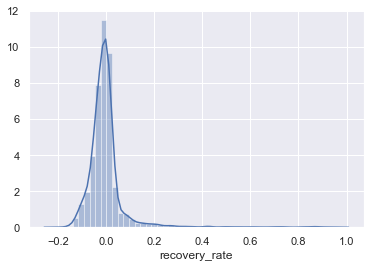

In [76]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)
# We plot the distribution of the residuals.

In [77]:
pickle.dump(reg_lgd_st_2, open('data/lgd_model_stage_2.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

### Combining Stage 1 and Stage 2

In [78]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [79]:
y_hat_test_lgd_stage_2_all

array([0.1193906 , 0.09605635, 0.13367631, ..., 0.12078611, 0.11587422,
       0.15667447])

In [80]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all
# Here we combine the predictions of the models from the two stages.

In [81]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,8648.00000000
mean,0.08689942
std,0.04994897
min,-0.00763403
25%,0.06383479
50%,0.10089284
75%,0.12331986
max,0.23697260


In [82]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [83]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,8648.00000000
mean,0.08690135
std,0.04994547
min,0.00000000
25%,0.06383479
50%,0.10089284
75%,0.12331986
max,0.23697260


# EAD model

## Estimate the CCF

In [84]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)

In [85]:
ead_inputs_train = ead_inputs_train[features_all]
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)

In [86]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression()

In [87]:
feature_name = ead_inputs_train.columns.values

In [88]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
pd.set_option('display.float_format', lambda x: '%.8f' % x)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.10974628,nan
1,grade A,-0.30300331,0.00000000
2,grade B,-0.23642766,0.00000000
3,grade C,-0.17202316,0.00000000
4,grade D,-0.11984702,0.00000000
5,grade E,-0.06768713,0.00000000
6,grade F,-0.02045907,0.00442880
7,home_ownership MORTGAGE,-0.00634334,0.00263246
8,home_ownership NONE,-0.00553906,0.93189306
9,home_ownership OTHER,-0.00242605,0.93358199


In [137]:
import pickle
pickle.dump(reg_ead, open('data/reg_ead.sav', 'wb'))

## Model Validation

In [89]:
ead_inputs_test = ead_inputs_test[features_all]
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)

ead_inputs_test.columns.values

array(['grade A', 'grade B', 'grade C', 'grade D', 'grade E', 'grade F',
       'home_ownership MORTGAGE', 'home_ownership NONE',
       'home_ownership OTHER', 'home_ownership OWN',
       'verification_status Not Verified',
       'verification_status Source Verified', 'purpose car',
       'purpose debt_consolidation', 'purpose educational',
       'purpose home_improvement', 'purpose house',
       'purpose major_purchase', 'purpose medical', 'purpose moving',
       'purpose other', 'purpose renewable_energy',
       'purpose small_business', 'purpose vacation', 'purpose wedding',
       'initial_list_status w', 'term_int', 'emp_length_int',
       'months_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [90]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
ead_targets_test_temp = ead_targets_test
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

,CCF,0
CCF,1.00000000,0.53065383
0,0.53065383,1.00000000


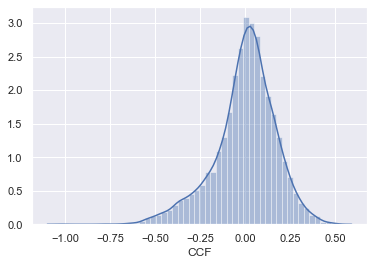

In [91]:
sns.distplot(ead_targets_test - y_hat_test_ead)

In [92]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.00000000
mean,0.73601308
std,0.10519419
min,0.38477382
25%,0.66155254
50%,0.73175038
75%,0.81062460
max,1.16108835


In [93]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [94]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.00000000
mean,0.73599212
std,0.10512721
min,0.38477382
25%,0.66155254
50%,0.73175038
75%,0.81062460
max,1.00000000


# Expected Credit Loss

## Calculating LGD and EAD based on the trained models for all items

In [95]:
loan_data_preprocessed = pd.read_csv('data/loan_data_2007_2014_processed.csv')
loan_data_preprocessed.drop('Unnamed: 0', inplace=True, axis=1)
loan_data_preprocessed.head()

/Users/graystone/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state TX,addr_state UT,addr_state VA,addr_state VT,addr_state WA,addr_state WI,addr_state WV,addr_state WY,initial_list_status f,initial_list_status w
0,1077501,1296599,5000,5000,4975.00000000,36 months,10.65000000,162.87000000,B,B2,...,0,0,0,0,0,0,0,0,1,0
1,1077430,1314167,2500,2500,2500.00000000,60 months,15.27000000,59.83000000,C,C4,...,0,0,0,0,0,0,0,0,1,0
2,1077175,1313524,2400,2400,2400.00000000,36 months,15.96000000,84.33000000,C,C5,...,0,0,0,0,0,0,0,0,1,0
3,1076863,1277178,10000,10000,10000.00000000,36 months,13.49000000,339.31000000,C,C1,...,0,0,0,0,0,0,0,0,1,0
4,1075358,1311748,3000,3000,3000.00000000,60 months,12.69000000,67.79000000,B,B5,...,0,0,0,0,0,0,0,0,1,0


In [96]:
loan_data_preprocessed = pd.read_csv('data/loan_data_2007_2014_processed.csv')
loan_data_preprocessed.drop('Unnamed: 0', inplace=True, axis=1)
loan_data_preprocessed.head()

/Users/graystone/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state TX,addr_state UT,addr_state VA,addr_state VT,addr_state WA,addr_state WI,addr_state WV,addr_state WY,initial_list_status f,initial_list_status w
0,1077501,1296599,5000,5000,4975.00000000,36 months,10.65000000,162.87000000,B,B2,...,0,0,0,0,0,0,0,0,1,0
1,1077430,1314167,2500,2500,2500.00000000,60 months,15.27000000,59.83000000,C,C4,...,0,0,0,0,0,0,0,0,1,0
2,1077175,1313524,2400,2400,2400.00000000,36 months,15.96000000,84.33000000,C,C5,...,0,0,0,0,0,0,0,0,1,0
3,1076863,1277178,10000,10000,10000.00000000,36 months,13.49000000,339.31000000,C,C1,...,0,0,0,0,0,0,0,0,1,0
4,1075358,1311748,3000,3000,3000.00000000,60 months,12.69000000,67.79000000,B,B5,...,0,0,0,0,0,0,0,0,1,0


In [97]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [98]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)

In [99]:
loan_data_preprocessed_lgd_ead['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_preprocessed_lgd_ead['mths_since_last_record'].fillna(0, inplace = True)

In [100]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [101]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [102]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']

In [103]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

In [104]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [105]:
loan_data_preprocessed['LGD'].describe()

count   466285.00000000
mean         0.92024700
std          0.05758929
min          0.37178862
25%          0.87322157
50%          0.89930016
75%          1.00000000
max          1.00000000
Name: LGD, dtype: float64

In [106]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [107]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])

In [108]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']

In [109]:
loan_data_preprocessed['EAD'].describe()

count   466285.00000000
mean     10814.84676015
std       6935.18456190
min        190.34737243
25%       5495.10141289
50%       9208.47959113
75%      14692.84454883
max      35000.00000000
Name: EAD, dtype: float64

In [110]:
loan_data_preprocessed.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state WV,addr_state WY,initial_list_status f,initial_list_status w,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD
0,1077501,1296599,5000,5000,4975.00000000,36 months,10.65000000,162.87000000,B,B2,...,0,0,1,0,1,0.08627127,0.08627127,0.91372873,0.58992169,2949.60844880
1,1077430,1314167,2500,2500,2500.00000000,60 months,15.27000000,59.83000000,C,C4,...,0,0,1,0,1,0.08451838,0.08451838,0.91548162,0.77777335,1944.43337805
2,1077175,1313524,2400,2400,2400.00000000,36 months,15.96000000,84.33000000,C,C5,...,0,0,1,0,1,0.08051618,0.08051618,0.91948382,0.65830596,1579.93430169
3,1076863,1277178,10000,10000,10000.00000000,36 months,13.49000000,339.31000000,C,C1,...,0,0,1,0,1,0.09507580,0.09507580,0.90492420,0.66065596,6606.55961167
4,1075358,1311748,3000,3000,3000.00000000,60 months,12.69000000,67.79000000,B,B5,...,0,0,1,0,1,0.08854720,0.08854720,0.91145280,0.70821056,2124.63166699


## Calculating PD for All items

In [111]:
loan_data_inputs_train = pd.read_csv('data/loan_data_inputs_train.csv')

In [112]:
loan_data_inputs_test = pd.read_csv('data/loan_data_inputs_test.csv')

In [113]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)

In [114]:
loan_data_inputs_pd.shape

(466285, 308)

In [115]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')
loan_data_inputs_pd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti 22.4-35,dti >35,mths_since_last_record_factor,mths_since_last_record Missing,mths_since_last_record 0-2,mths_since_last_record 3-20,mths_since_last_record 21-31,mths_since_last_record 32-80,mths_since_last_record 81-86,mths_since_last_record >=86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
464103,4545797,5798012,18000,18000,18000.00000000,36 months,9.67000000,578.03000000,B,B1,...,0,0,NaN,1,0,0,0,0,0,0
449524,11455994,13388159,25000,25000,24925.00000000,60 months,14.98000000,594.49000000,C,C3,...,0,0,NaN,1,0,0,0,0,0,0
37592,379025,404949,15000,15000,13975.00000000,36 months,9.63000000,481.42000000,A,A5,...,0,0,NaN,1,0,0,0,0,0,0
49075,9785537,11637587,8400,8400,8400.00000000,36 months,12.85000000,282.43000000,B,B4,...,1,0,NaN,1,0,0,0,0,0,0
79488,7728332,9429912,16550,16550,16500.00000000,36 months,8.60000000,523.21000000,A,A4,...,1,0,NaN,1,0,0,0,0,0,0


In [116]:
features_pd_all = ['grade A',
'grade B',
'grade C',
'grade D',
'grade E',
'grade F',
'grade G',
'home_ownership RENT_OTHER_NONE_ANY',
'home_ownership OWN',
'home_ownership MORTGAGE',
'addr_state ND_NE_IA_NV_FL_HI_AL',
'addr_state NM_VA',
'addr_state NY',
'addr_state OK_TN_MO_LA_MD_NC',
'addr_state CA',
'addr_state UT_KY_AZ_NJ',
'addr_state AR_MI_PA_OH_MN',
'addr_state RI_MA_DE_SD_IN',
'addr_state GA_WA_OR',
'addr_state WI_MT',
'addr_state TX',
'addr_state IL_CT',
'addr_state KS_SC_CO_VT_AK_MS',
'addr_state WV_NH_WY_DC_ME_ID',
'verification_status Not Verified',
'verification_status Source Verified',
'verification_status Verified',
'purpose educ__sm_b__wedd__ren_en__mov__house',
'purpose credit_card',
'purpose debt_consolidation',
'purpose oth__med__vacation',
'purpose major_purch__car__home_impr',
'initial_list_status f',
'initial_list_status w',
'term 36',
'term 60',
'emp_length 0',
'emp_length 1',
'emp_length 2-4',
'emp_length 5-6',
'emp_length 7-9',
'emp_length 10',
'mths_issue_d <38',
'mths_issue_d 38-39',
'mths_issue_d 40-41',
'mths_issue_d 42-48',
'mths_issue_d 49-52',
'mths_issue_d 53-64',
'mths_issue_d 65-84',
'mths_issue_d >84',
'int_rate <9.548',
'int_rate 9.548-12.025',
'int_rate 12.025-15.74',
'int_rate 15.74-20.281',
'int_rate >20.281',
'mths_since_earliest_cr_line <140',
'mths_since_earliest_cr_line 141-164',
'mths_since_earliest_cr_line 165-247',
'mths_since_earliest_cr_line 248-270',
'mths_since_earliest_cr_line 271-352',
'mths_since_earliest_cr_line >352',
'inq_last_6mths 0',
'inq_last_6mths 1-2',
'inq_last_6mths 3-6',
'inq_last_6mths >6',
'acc_now_delinq 0',
'acc_now_delinq >=1',
'annual_inc <20K',
'annual_inc 20K-30K',
'annual_inc 30K-40K',
'annual_inc 40K-50K',
'annual_inc 50K-60K',
'annual_inc 60K-70K',
'annual_inc 70K-80K',
'annual_inc 80K-90K',
'annual_inc 90K-100K',
'annual_inc 100K-120K',
'annual_inc 120K-140K',
'annual_inc >140K',
'dti <=1.4',
'dti 1.4-3.5',
'dti 3.5-7.7',
'dti 7.7-10.5',
'dti 10.5-16.1',
'dti 16.1-20.3',
'dti 20.3-21.7',
'dti 21.7-22.4',
'dti 22.4-35',
'dti >35',
'mths_since_last_delinq Missing',
'mths_since_last_delinq 0-3',
'mths_since_last_delinq 4-30',
'mths_since_last_delinq 31-56',
'mths_since_last_delinq >=57',
'mths_since_last_record Missing',
'mths_since_last_record 0-2',
'mths_since_last_record 3-20',
'mths_since_last_record 21-31',
'mths_since_last_record 32-80',
'mths_since_last_record 81-86',
'mths_since_last_record >=86']

In [117]:
ref_categories_pd = ['grade G',
'home_ownership RENT_OTHER_NONE_ANY',
'addr_state ND_NE_IA_NV_FL_HI_AL',
'verification_status Verified',
'purpose educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status f',
'term 60',
'emp_length 0',
'mths_issue_d >84',
'int_rate >20.281',
'mths_since_earliest_cr_line <140',
'inq_last_6mths >6',
'acc_now_delinq 0',
'annual_inc <20K',
'dti >35',
'mths_since_last_delinq 0-3',
'mths_since_last_record 0-2']

In [118]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_pd_all]

In [119]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)

In [120]:
loan_data_inputs_pd_temp.shape

(466285, 84)

In [121]:
import pickle
reg_pd = pickle.load(open('data/pd_model.sav', 'rb'))

In [122]:
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

array([0.05157264, 0.06062145, 0.07889654, ..., 0.19908893, 0.08923748,
       0.07129848])

In [123]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]

In [124]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
464103   0.05157264
449524   0.06062145
37592    0.07889654
49075    0.12842390
79488    0.04385346
Name: PD, dtype: float64

In [125]:
loan_data_inputs_pd['PD'].describe()

count   466285.00000000
mean         0.10885422
std          0.07155034
min          0.00695439
25%          0.05514117
50%          0.09263849
75%          0.14631351
max          0.65184951
Name: PD, dtype: float64

In [126]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)

In [127]:
loan_data_preprocessed_new.shape

(466285, 502)

In [128]:
loan_data_preprocessed_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti >35,mths_since_last_record_factor,mths_since_last_record Missing,mths_since_last_record 0-2,mths_since_last_record 3-20,mths_since_last_record 21-31,mths_since_last_record 32-80,mths_since_last_record 81-86,mths_since_last_record >=86,PD
0,1077501,1296599,5000,5000,4975.00000000,36 months,10.65000000,162.87000000,B,B2,...,0,NaN,1,0,0,0,0,0,0,0.16365709
1,1077430,1314167,2500,2500,2500.00000000,60 months,15.27000000,59.83000000,C,C4,...,0,NaN,1,0,0,0,0,0,0,0.27020279
2,1077175,1313524,2400,2400,2400.00000000,36 months,15.96000000,84.33000000,C,C5,...,0,NaN,1,0,0,0,0,0,0,0.23957056
3,1076863,1277178,10000,10000,10000.00000000,36 months,13.49000000,339.31000000,C,C1,...,0,NaN,1,0,0,0,0,0,0,0.21586336
4,1075358,1311748,3000,3000,3000.00000000,60 months,12.69000000,67.79000000,B,B5,...,0,NaN,1,0,0,0,0,0,0,0.12922021


## Calculating Expected Credit Loss

In [129]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']
# We calculate Expected Loss. EL = PD * LGD * EAD.

In [130]:
loan_data_preprocessed_new['EL'].describe()

count   466285.00000000
mean      1071.55419532
std       1093.89371303
min          9.28904358
25%        349.47209537
50%        698.54155423
75%       1390.24474131
max      11840.70472407
Name: EL, dtype: float64

In [131]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.16365709,0.91372873,2949.60844880,441.07910264
1,2500,2500,0.27020279,0.91548162,1944.43337805,480.98609910
2,2400,2400,0.23957056,0.91948382,1579.93430169,348.02990895
3,10000,10000,0.21586336,0.90492420,6606.55961167,1290.52518630
4,3000,3000,0.12922021,0.91145280,2124.63166699,250.23511765


In [132]:
loan_data_preprocessed_new['funded_amnt'].describe()

,funded_amnt,funded_amnt
count,466285.00000000,466285.00000000
mean,14291.80104443,14291.80104443
std,8274.37129999,8274.37129999
min,500.00000000,500.00000000
25%,8000.00000000,8000.00000000
50%,12000.00000000,12000.00000000
75%,20000.00000000,20000.00000000
max,35000.00000000,35000.00000000


In [133]:
loan_data_preprocessed_new['EL'].sum()

499649647.96660846

In [134]:
loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    6664052450
funded_amnt    6664052450
dtype: int64

In [135]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()
# Total Expected Loss as a proportion of total funded amount for all loans.

funded_amnt   0.07497685
funded_amnt   0.07497685
dtype: float64

## The End